# **News Headlines Dataset For Sarcasm Detection**

**Import required** **libraries**

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras  
import tensorflow_datasets as tfds
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import re
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

**Dataset**

In [230]:
df = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [0]:
data = df.drop(['article_link'],axis=1)

In [232]:
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


**Check for missing** **values**

In [233]:
data.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [0]:
target = df['is_sarcastic'].values

In [235]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

**Pie chart showing the percentage of sarcastic and non-sarcastic headline**

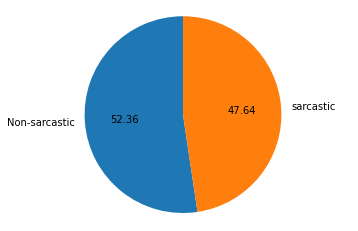

In [217]:
# import the pyplot library
import matplotlib.pyplot as plotter
# The slice names of a sarcasm distribution pie chart
pieLabels   = 'Non-sarcastic', 'sarcastic'
# sarcasm data
is_sarcastic     = [14985, 13634]
figureObject, axesObject = plotter.subplots()
# Draw the pie chart
axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)
axesObject.axis('equal')
plotter.show()

## **Data pre-processing and using TFIDF**

**TFIDF Vectorizer**

TFIDF is the abbreviation of Term Frequency and Inverse Document Frequency.

Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. It tells you that the token 'me' is represented as feature number 8 in the output matrix.

**Tokenize and build vocab**

In [11]:
tfidf = TfidfVectorizer()
tfidf.fit(data['headline'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

**Initialize target**

In [0]:
import numpy as np
target = np.array(data['is_sarcastic'],dtype='int')

**Encode document**

In [0]:
vector = tfidf.transform(data['headline'].values)

In [0]:
vector = vector.toarray()

In [15]:
vector.shape

(28619, 26336)

In [0]:
tsvd = TruncatedSVD(n_components=100)
tsvd.fit(vector)
scaled = tsvd.transform(vector)

In [20]:
print(scaled.shape)

(28619, 100)


**Defining the sequential model**

In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(50, input_shape=[100,], activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
]) 

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

**Train the model**

In [41]:
model.fit(scaled, target, epochs=20,verbose=2, validation_split=0.2)

Epoch 1/20
716/716 - 1s - loss: 0.5281 - accuracy: 0.7240 - val_loss: 0.4689 - val_accuracy: 0.7731
Epoch 2/20
716/716 - 1s - loss: 0.4647 - accuracy: 0.7788 - val_loss: 0.4579 - val_accuracy: 0.7783
Epoch 3/20
716/716 - 1s - loss: 0.4580 - accuracy: 0.7815 - val_loss: 0.4525 - val_accuracy: 0.7820
Epoch 4/20
716/716 - 1s - loss: 0.4492 - accuracy: 0.7842 - val_loss: 0.4518 - val_accuracy: 0.7884
Epoch 5/20
716/716 - 1s - loss: 0.4407 - accuracy: 0.7924 - val_loss: 0.4469 - val_accuracy: 0.7883
Epoch 6/20
716/716 - 1s - loss: 0.4327 - accuracy: 0.7937 - val_loss: 0.4436 - val_accuracy: 0.7888
Epoch 7/20
716/716 - 1s - loss: 0.4238 - accuracy: 0.7998 - val_loss: 0.4446 - val_accuracy: 0.7844
Epoch 8/20
716/716 - 1s - loss: 0.4174 - accuracy: 0.8029 - val_loss: 0.4430 - val_accuracy: 0.7869
Epoch 9/20
716/716 - 1s - loss: 0.4106 - accuracy: 0.8068 - val_loss: 0.4415 - val_accuracy: 0.7904
Epoch 10/20
716/716 - 1s - loss: 0.4051 - accuracy: 0.8073 - val_loss: 0.4413 - val_accuracy: 0.7905

# **Using word embeddings**



In word embeddings words or phrases from the vocabulary are mapped to vectors of real numbers.

In [0]:
text = df['headline'].values

**Tokenize each sentence**

In [164]:
text_arr = [row.split(' ') for row in text]
text_arr

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'of',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'why',
  'congress',
  'is',
  'falling',
  'short',
  'on',
  'gender,',
  'racial',
  'equality'],
 ['eat', 'your', 'veggies:', '9', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'from', 'getting', 'to', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'to',
  'using',
  'word',
  "'streaming'",
  'correctly'],
 ['my', 'white', 'inheritance'],
 ['5', 'ways', 'to', 'file', 'your', 'taxes', 'with', 'less', 'stress'],
 ['richard',
  "branson's",
  'global-warming',
  'donation',
  'nearly',
  'as',
  'much',
  'as',
  'cost',
  'of',
  'failed',
  'balloon',
  'trips'],
 ['shadow',
  'government',
  'getting',
  'too',
  'large',
  'to',
  'meet',
  'in',
  'marriott',
  'conference',
  'room',
  'b'],
 ['lots', 'of', 'parents', 'know', 'this', 'scenario'],
 ['this',
  'lesbian',
  'is',
  'con

**Function to clean token vector of symbols**

In [0]:
def clean_word(word_list):
  new = []
  for i, word in enumerate(word_list):
    word = word.replace('.', '')
    word = word.replace(',', '')
    word = word.replace(';', '')

    word = word.lower()
    if word.isalpha() or word.isdigit():
      new.append(word)
    
  return new

**Clean every token word and create vocabulary out of it.**

In [0]:
vocab = []
clean_text_array = []

for row in text_arr:
  clean_row = clean_word(row)
  clean_text_array.append(clean_row)
  vocab.extend(clean_row)

**making sure each word appears only once in the vocabulary**

In [0]:
vocabulary = list(set(clean_word(vocab)))

In [168]:
len(vocabulary)

24679

In [0]:
from sklearn.preprocessing import LabelEncoder


**Create token vector using Label Encoder to fit on entire vocabulary**

In [0]:
vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)

token_vector = []

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector
max_words = 0 
for row in clean_text_array:
  encoded = vectorizer.transform(row).tolist()
  size = len(encoded)
  if size>max_words: max_words=size
  token_vector.append(encoded)

In [171]:
vectorizer.classes_[1379]

'articulated'

In [172]:
max_words

150

**Pad every vector in token vector corpus to be as long as longest vector**

In [0]:
padded = []
for row in token_vector:
  r = np.pad(row, (0, max_words-len(row)), 'constant')
  padded.append(r)

**Convert it into numpy array, we'll call this the examples vector as it contains all the example to be trained on**

In [0]:
ex_vector = np.array(padded)

In [175]:
ex_vector

array([[22124., 19267., 23267., ...,     0.,     0.,     0.],
       [ 5897., 18212., 22413., ...,     0.,     0.,     0.],
       [ 7062., 24578.,   322., ...,     0.,     0.,     0.],
       ...,
       [22060., 14311.,  2065., ...,     0.,     0.,     0.],
       [13428., 17031.,  6099., ...,     0.,     0.,     0.],
       [ 5507.,  4139., 22125., ...,     0.,     0.,     0.]])

**Split the data into train and test data**

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.2)

In [294]:
ytrain

array([0, 0, 1, ..., 0, 1, 0])

**Load and convert the numpy array into a Tensor and then transform that into a BatchDataset TF Object to load into the Embedding Layer to the Keras Model**

In [0]:
#Create a tensor out of numpy array
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

In [0]:
#Shuffle the data and create batches out of it
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

 **Creating the model**

Define the embedding dimensions // features around which the model will learn based on correlation

In [0]:
embedding_dim=16

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector
model = keras.models.Sequential([
  keras.layers.Embedding(24679, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])


In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

**Train the model**

In [300]:
epochs=10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Epoch 1/10
358/358 - 2s - loss: 0.6880 - accuracy: 0.5264 - val_loss: 0.6786 - val_accuracy: 0.5522
Epoch 2/10
358/358 - 2s - loss: 0.6398 - accuracy: 0.7060 - val_loss: 0.5867 - val_accuracy: 0.7781
Epoch 3/10
358/358 - 2s - loss: 0.5179 - accuracy: 0.8026 - val_loss: 0.4669 - val_accuracy: 0.8064
Epoch 4/10
358/358 - 2s - loss: 0.4225 - accuracy: 0.8231 - val_loss: 0.4134 - val_accuracy: 0.8202
Epoch 5/10
358/358 - 2s - loss: 0.3767 - accuracy: 0.8408 - val_loss: 0.3908 - val_accuracy: 0.8309
Epoch 6/10
358/358 - 2s - loss: 0.3488 - accuracy: 0.8525 - val_loss: 0.3793 - val_accuracy: 0.8344
Epoch 7/10
358/358 - 2s - loss: 0.3281 - accuracy: 0.8628 - val_loss: 0.3702 - val_accuracy: 0.8421
Epoch 8/10
358/358 - 2s - loss: 0.3102 - accuracy: 0.8697 - val_loss: 0.3697 - val_accuracy: 0.8387
Epoch 9/10
358/358 - 2s - loss: 0.2963 - accuracy: 0.8759 - val_loss: 0.3855 - val_accuracy: 0.8256
Epoch 10/10
358/358 - 1s - loss: 0.2841 - accuracy: 0.8829 - val_loss: 0.3609 - val_accuracy: 0.8419

**Accuracy graph**

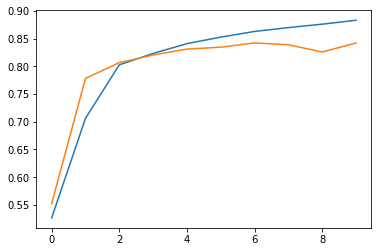

In [301]:
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])

**Loss graph**

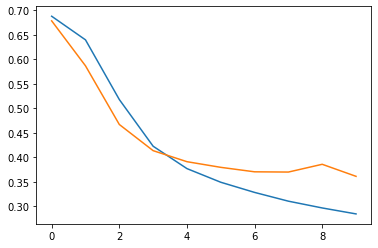

In [302]:
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])

# **Using RNN**

RNN a recurrent neural network is a class of artificial neural network. Unlike feed-forward neural networks, recurrent neural networks have a backward connection between hidden layers. Therefore, they have some kind of memory in them.

**Filtering headlines So that only valid headlines remain** 

In [0]:
data['headline'] = data['headline'].apply(lambda x: x.lower())
data['headline'] = data['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

**Using Tokenizer to vectorize and convert text into Sequences**

In [0]:
max_features = 2000
t = Tokenizer(num_words=max_features, split=' ')

In [0]:
t.fit_on_texts(data['headline'].values)

In [0]:
x = t.texts_to_sequences(df['headline'].values)
x = pad_sequences(x)

In [0]:
y = pd.get_dummies(df['is_sarcastic']).values

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [242]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(19174, 76) (19174, 2)
(9445, 76) (9445, 2)


**Define the LSTM RNN Model**

LSTM(Long short term memory) is used to remember past data in memory

In [0]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = x.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [244]:
batch_size = 32
history = model.fit(xtrain, ytrain, epochs = 25, batch_size=batch_size, verbose = 2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Epoch 1/25
 - 124s - loss: 0.4522 - accuracy: 0.7813
Epoch 2/25
 - 119s - loss: 0.3462 - accuracy: 0.8491
Epoch 3/25
 - 119s - loss: 0.3102 - accuracy: 0.8671
Epoch 4/25
 - 120s - loss: 0.2870 - accuracy: 0.8786
Epoch 5/25
 - 120s - loss: 0.2706 - accuracy: 0.8850
Epoch 6/25
 - 120s - loss: 0.2522 - accuracy: 0.8938
Epoch 7/25
 - 119s - loss: 0.2380 - accuracy: 0.8986
Epoch 8/25
 - 117s - loss: 0.2264 - accuracy: 0.9038
Epoch 9/25
 - 118s - loss: 0.2095 - accuracy: 0.9104
Epoch 10/25
 - 117s - loss: 0.2034 - accuracy: 0.9149
Epoch 11/25
 - 119s - loss: 0.1846 - accuracy: 0.9230
Epoch 12/25
 - 121s - loss: 0.1725 - accuracy: 0.9275
Epoch 13/25
 - 121s - loss: 0.1604 - accuracy: 0.9326
Epoch 14/25
 - 121s - loss: 0.1538 - accuracy: 0.9363
Epoch 15/25
 - 119s - loss: 0.1391 - accuracy: 0.9421
Epoch 16/25
 - 119s - loss: 0.1267 - accuracy: 0.9486
Epoch 17/25
 - 129s - loss: 0.1186 - accuracy: 0.9522
Epoch 18/25
 - 141s - loss: 0.1132 - accuracy: 0.9542
Epoch 19/25
 - 140s - loss: 0.0968 - 

# **Conclusion**
Using TFIDF the accuracy is 83%

Using Word Embeddings the accuracy is 88% 

And for LSTM/RNN Model the accuracy is 97.40% which is most accurate among all others

Hence RNN Model best predicts if a sentence is Sarcastic or not.